In [ ]:
# Copyright 2025 Google LLC
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Event-based Triggering of Manual Recrawl for Vertex AI Search Advanced Website Datastores

<table align="left">
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-colab&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-colab&destination=vais_notebook-from_notebook-colab&url=https%3A%2F%2Fcolab.research.google.com%2Fgithub%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fblob%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_search%2Fmanual_recrawl_urls_with_trigger.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/colab-logo-32px.png" alt="Google Colaboratory logo"><br> Open in Colab
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-colab_ent&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-colab_ent&destination=vais_notebook-from_notebook-colab_ent&url=https%3A%2F%2Fconsole.cloud.google.com%2Fvertex-ai%2Fcolab%2Fimport%2Fhttps%3A%252F%252Fraw.githubusercontent.com%252FGoogleCloudPlatform%252Fapplied-ai-engineering-samples%252Fmain%252Fgenai-on-vertex-ai%252Fvertex_ai_search%252Fmanual_recrawl_urls_with_trigger.ipynb"">
      <img width="32px" src="https://lh3.googleusercontent.com/JmcxdQi-qOpctIvWKgPtrzZdJJK-J3sWE1RsfjZNwshCFgE_9fULcNpuXYTilIR2hjwN" alt="Google Cloud Colab Enterprise logo"><br> Open in Colab Enterprise
    </a>
  </td>    
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-vai_workbench&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-vai_workbench&destination=vais_notebook-from_notebook-vai_workbench&url=https%3A%2F%2Fconsole.cloud.google.com%2Fvertex-ai%2Fworkbench%2Fdeploy-notebook%3Fdownload_url%3Dhttps%3A%2F%2Fraw.githubusercontent.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_search%2Fmanual_recrawl_urls_with_trigger.ipynb">
      <img src="https://lh3.googleusercontent.com/UiNooY4LUgW_oTvpsNhPpQzsstV5W8F7rYgxgGBD85cWJoLmrOzhVs_ksK_vgx40SHs7jCqkTkCk=e14-rj-sc0xffffff-h130-w32" alt="Vertex AI logo"><br> Open in Workbench
    </a>
  </td>
  <td style="text-align: center">
    <a href="https://art-analytics.appspot.com/r.html?uaid=G-FHXEFWTT4E&utm_source=aRT-vais_notebook-from_notebook-github&utm_medium=aRT-clicks&utm_campaign=vais_notebook-from_notebook-github&destination=vais_notebook-from_notebook-github&url=https%3A%2F%2Fgithub.com%2FGoogleCloudPlatform%2Fapplied-ai-engineering-samples%2Fblob%2Fmain%2Fgenai-on-vertex-ai%2Fvertex_ai_search%2Fmanual_recrawl_urls_with_trigger.ipynb">
      <img src="https://cloud.google.com/ml-engine/images/github-logo-32px.png" alt="GitHub logo"><br> View on GitHub
    </a>
  </td>
</table>


| | |
|----------|-------------|
| Author(s)   | Hossein Mansour|
| Reviewers(s) | Abhishek Bhagwat|
| Last updated | 2025-01-03: Initial commit |

# Overview

In this notebook, we demonstrate how to automate [manual recrawl](https://cloud.google.com/generative-ai-app-builder/docs/recrawl-websites#manual_refresh) to keep an [Advanced Website Search](https://cloud.google.com/generative-ai-app-builder/docs/about-advanced-features#advanced-website-indexing) datastores within [Vertex AI Search](https://cloud.google.com/generative-ai-app-builder/docs/introduction).

We focus on a particular workflow where the list of URLs to-be-crawled land as a JSON file in a GCS bucket. This then triggers parsing of the URLs and passing them to the manual Recrawl API call. One can automate different workflows where, for instance, the list of new URLs is added to a BQ table, etc.

The workflow demonstrated here is useful for automating other workflows. An example of that would be to trigger a document import as a new PDF file lands on a GCS bucket.

You can find more information about advanced website search datastore and its differences with the basic website search datastore [here](https://cloud.google.com/generative-ai-app-builder/docs/about-advanced-features#advanced-website-indexing).

The web pages in an advanced website search datastore are refreshed in the following ways:

* **Automatic refresh**: Discovers added, deleted, and updated pages and reindexes those on a best-effort basis. The expected indexing latency is in the order of 2 weeks at the time of preparing this notebook.
* [**Manual refresh**](https://cloud.google.com/generative-ai-app-builder/docs/recrawl-websites): Customers can initiate manual recrawl of an explicit list of URLs (not URL patterns) within certain [limits](https://cloud.google.com/generative-ai-app-builder/docs/recrawl-websites#limits_on_recrawling). While there is no SLO around manual recrawls, they typically happen within minutes to hours depending on the size.
* [**Sitemap-based refresh**](https://cloud.google.com/generative-ai-app-builder/docs/index-refresh-sitemap): Customers can submit and use sitemaps to index and refresh the web pages in your data store. This feature supports only XML sitemaps and sitemap indexes. The indexing latency with this approach is in the order of hours.

The automation demonstrated in this notebook is relevant for manual recrawl as stated above.

As opposed to other notebooks in the repository, this notebook is not self contained and requires an existing datastore. We demonstrate a step-by-step guide on how to add the trigger and subsequent automation from within the UI. We also provide a gcloud function to automate part of the process.

We will perform the following steps:

- Creating a GCS bucket for staging
- Creating cloud function and trigger via UI
- Deploying the function
- Testing with a sample JSON


# Vertex AI Search
Vertex AI Search (VAIS) is a fully-managed platform, powered by large language models, that lets you build AI-enabled search and recommendation experiences for your public or private websites or mobile applications

VAIS can handle a diverse set of data sources including structured, unstructured, and website data, as well as data from third-party applications such as Jira, Salesforce, and Confluence.

VAIS also has built-in integration with LLMs which enables you to provide answers to complex questions, grounded in your data

# Using this Notebook
This notebook cannot be run as is. It's more of a step-by-step guide on how to achieve the goal via UI.

## Google Cloud Project Setup

1. [Select or create a Google Cloud project](https://console.cloud.google.com/cloud-resource-manager). When you first create an account, you get a $300 free credit towards your compute/storage costs
2. [Make sure that billing is enabled for your project](https://cloud.google.com/billing/docs/how-to/modify-project)
3. [Enable the Service Usage API](https://console.cloud.google.com/apis/library/serviceusage.googleapis.com)
4. [Enable the Cloud Storage API](https://console.cloud.google.com/flows/enableapi?apiid=storage.googleapis.com)
5. [Enable the Discovery Engine API for your project](https://console.cloud.google.com/marketplace/product/google/discoveryengine.googleapis.com)

## Google Cloud Permissions

Ideally you should have [Owner role](https://cloud.google.com/iam/docs/understanding-roles) for your project to run this notebook. If that is not an option, you need at least the following [roles](https://cloud.google.com/iam/docs/granting-changing-revoking-access)
- **`roles/serviceusage.serviceUsageAdmin`** to enable APIs
- **`roles/iam.serviceAccountAdmin`** to modify service agent permissions
- **`roles/discoveryengine.admin`** to modify discoveryengine assets

# Create GCS bucket

As a prerequisite, we need a GCS bucket to use it as a staging area. JSON files containing URLs-to-be-crawled will land there.

We call this bucket `recrawl_test` and use `us-central1` for the location.

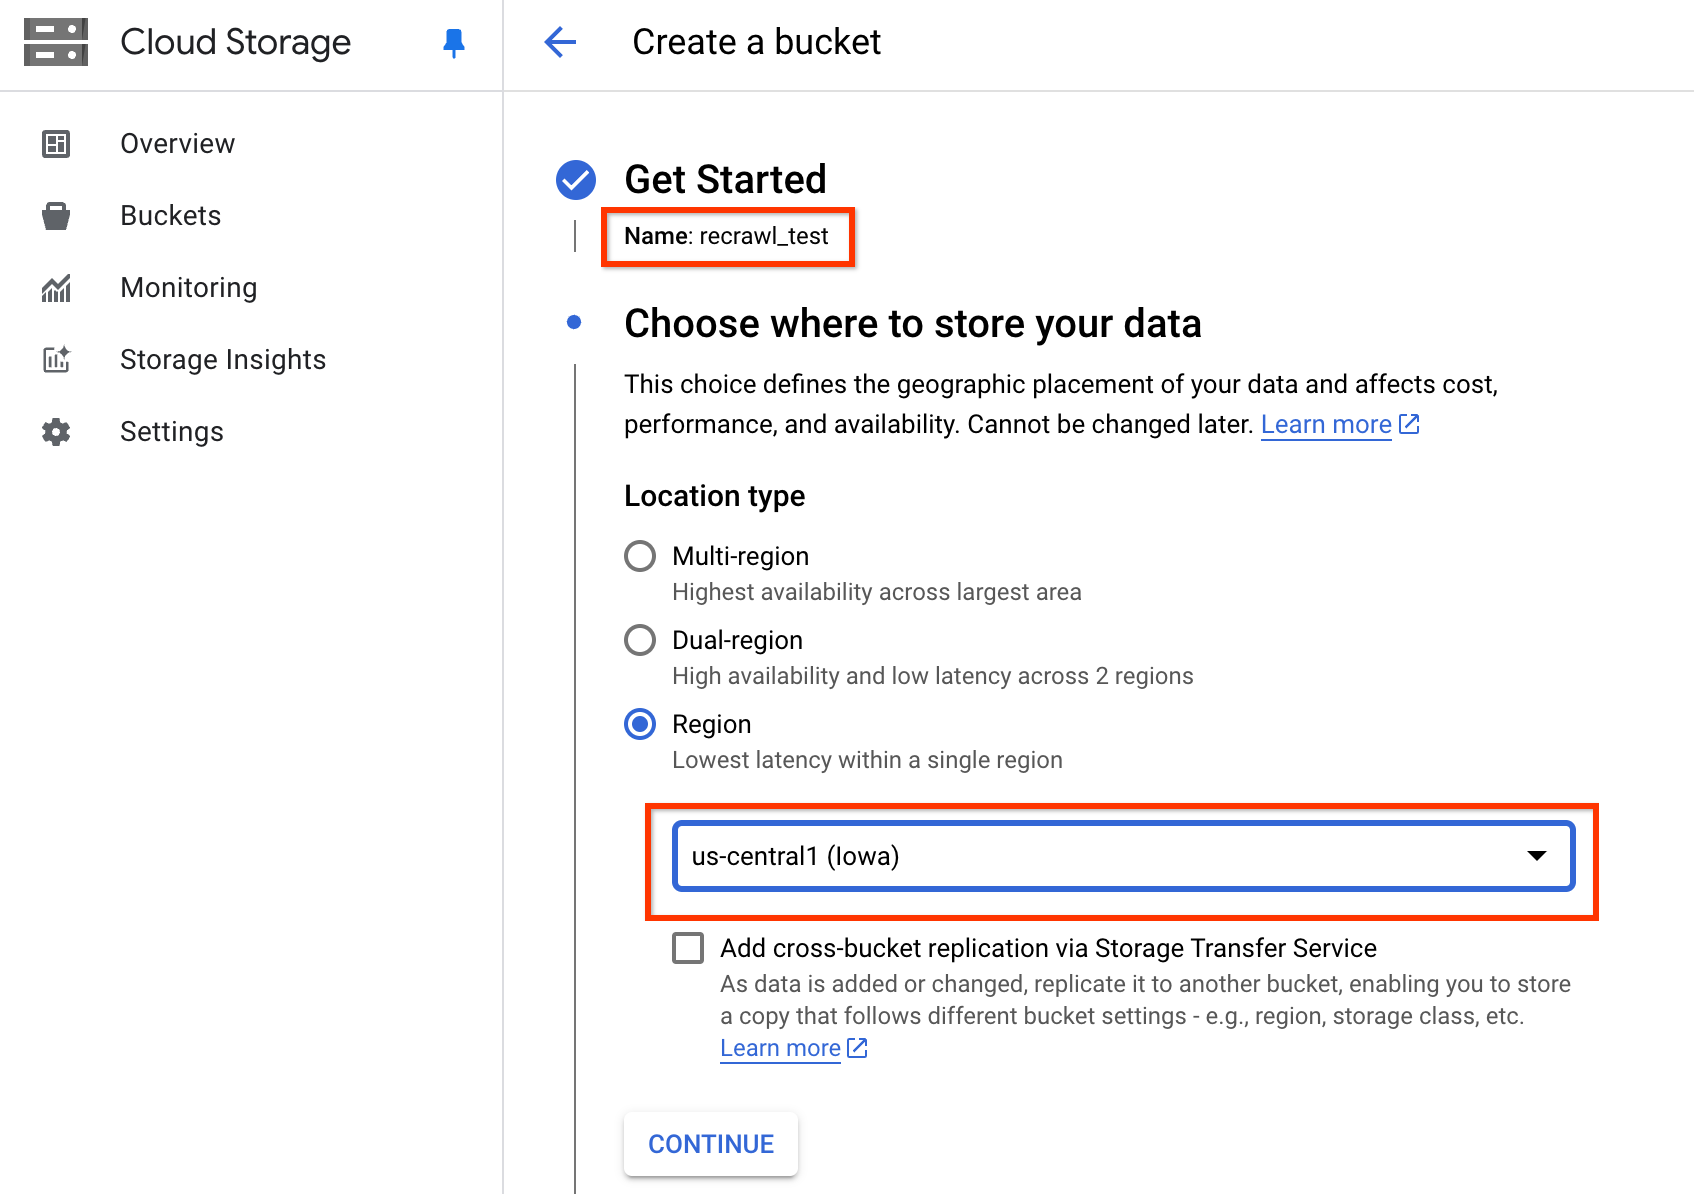

# Create cloud run function

As the next step, we create a cloud run function from within the bucket
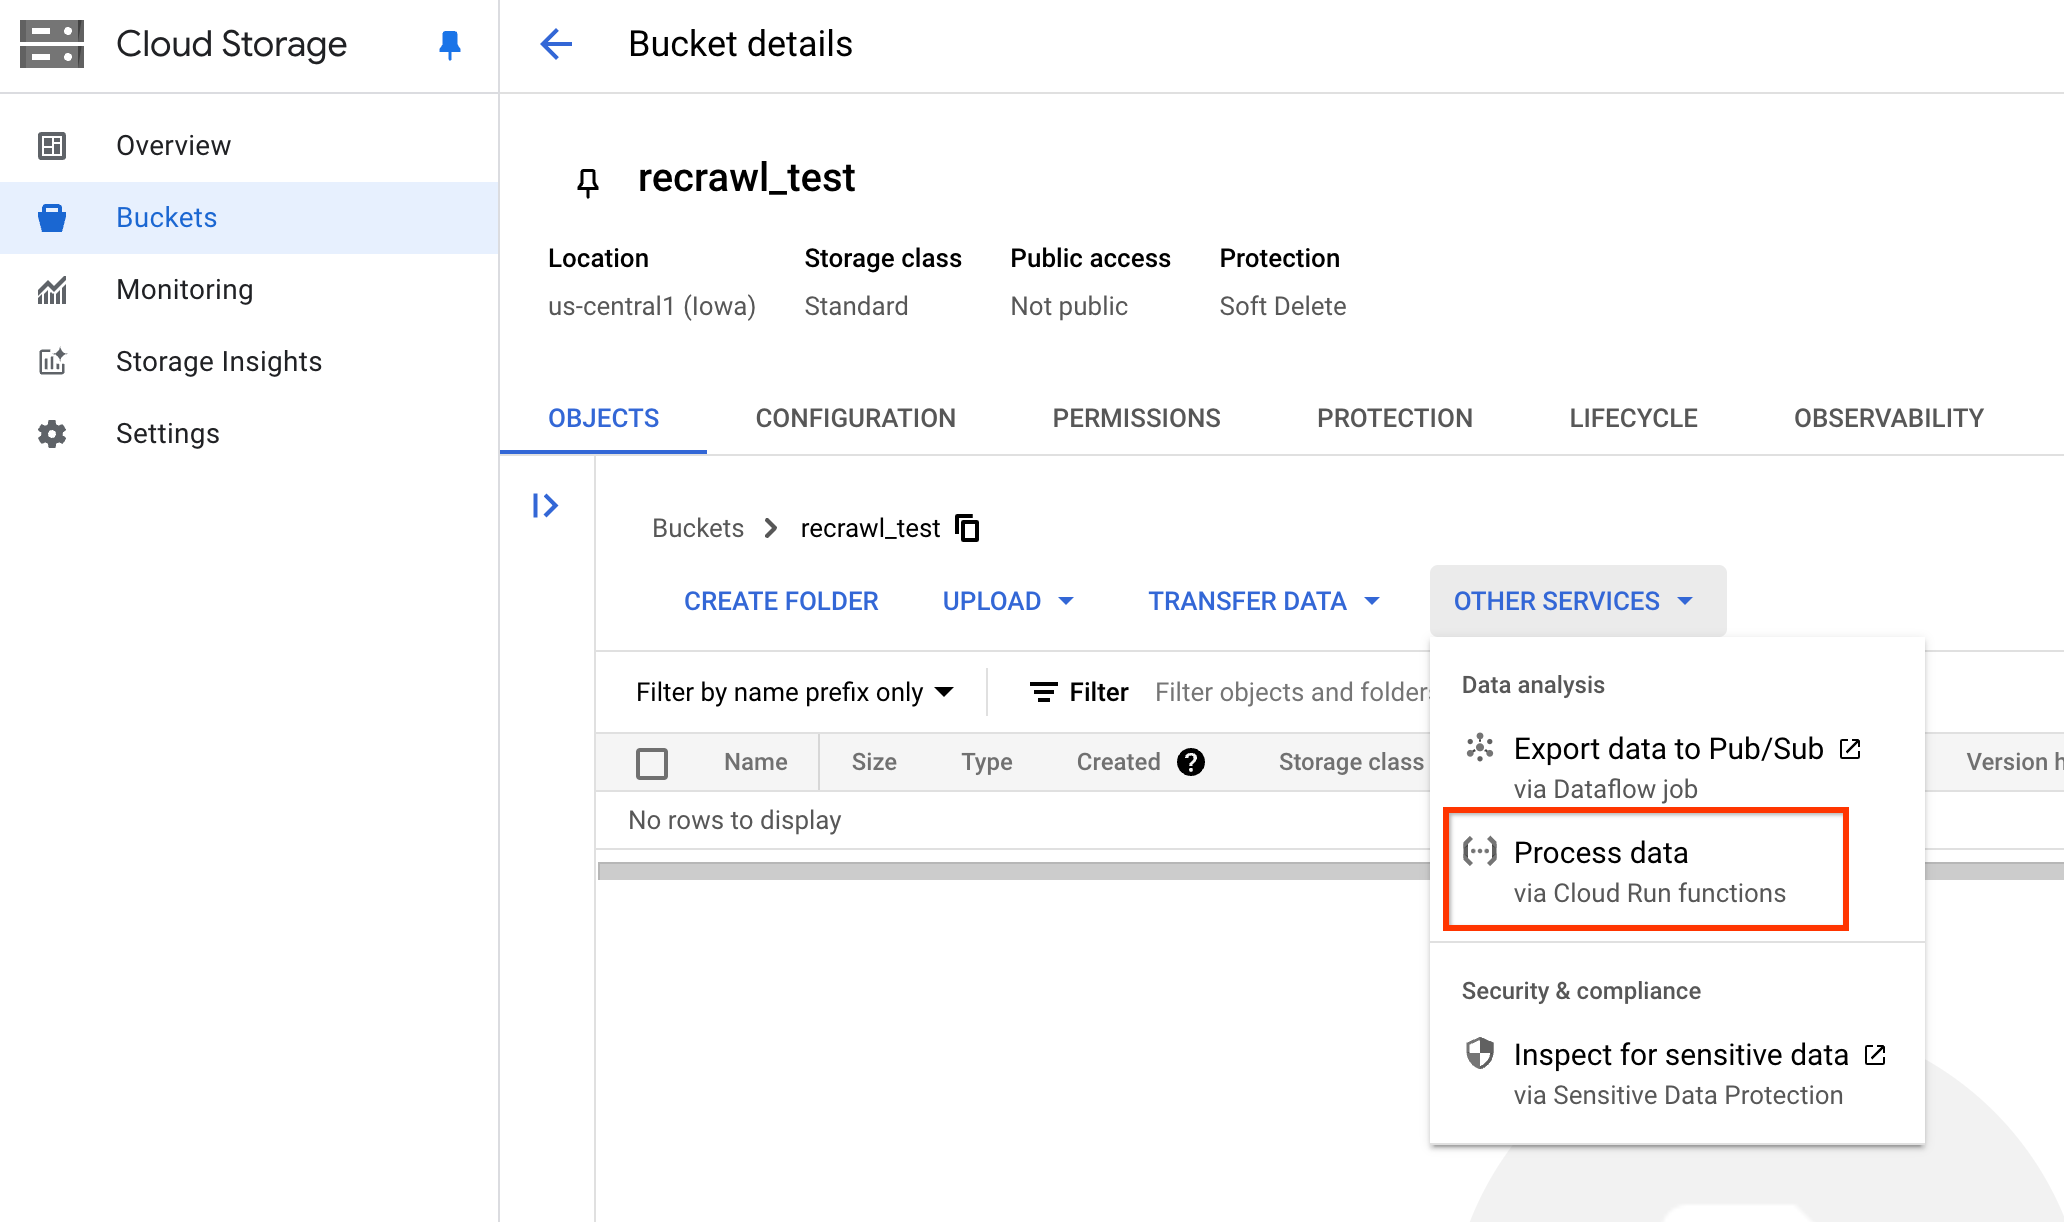

# Basic settings of the cloud run function

Here we apply the basic settings to our cloud function. Specifically, we use the same region as our bucket (`us-central1` in this example), set the event type to finalized, and give our function a meaningful name.

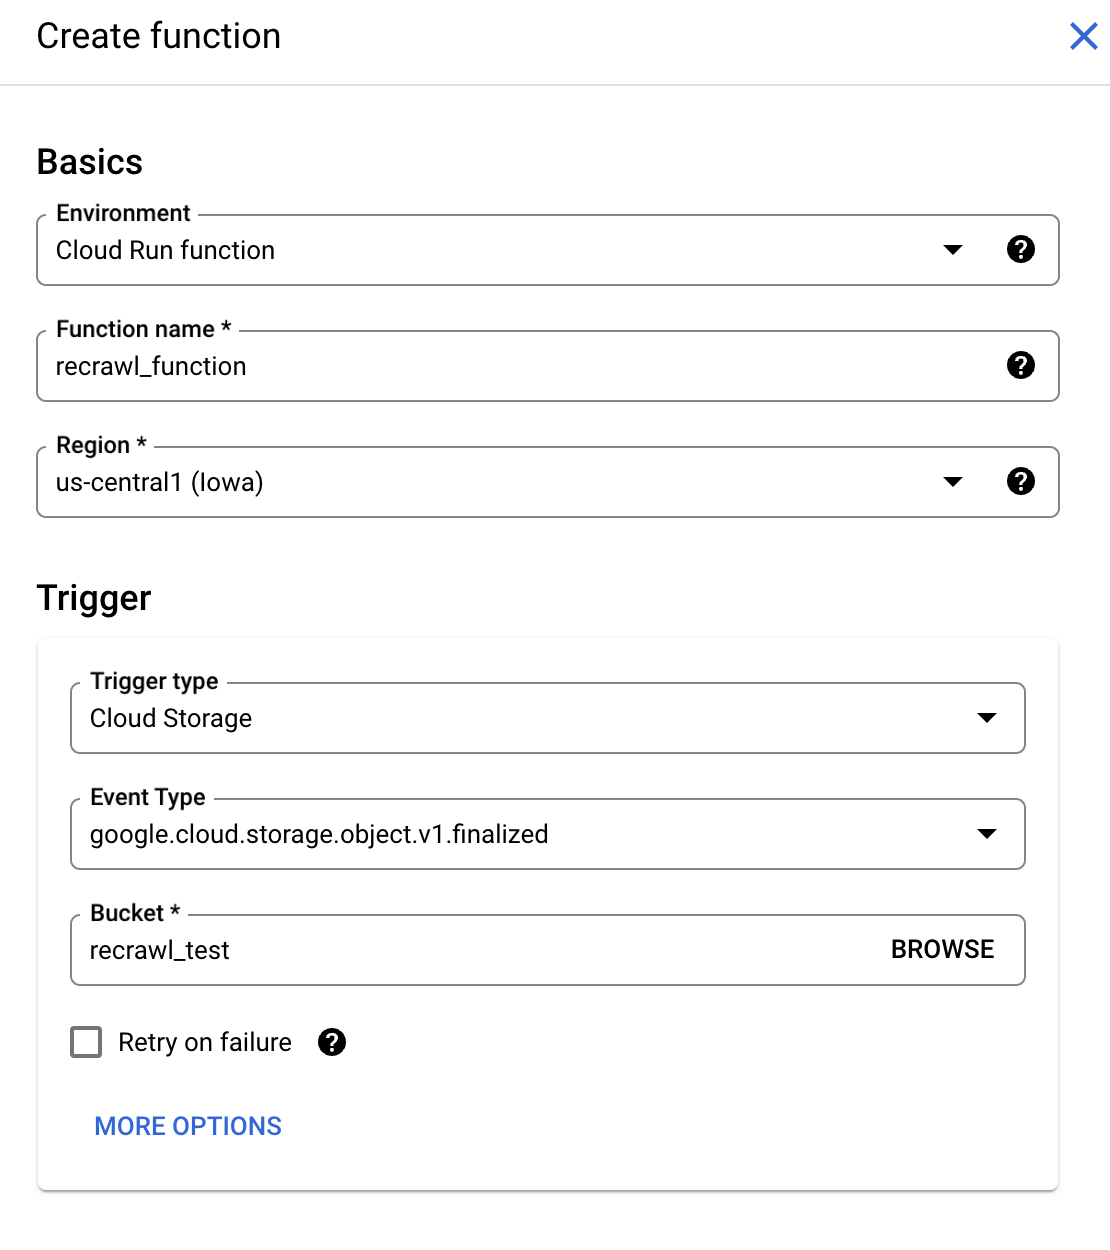

# Add the function source

In this step we add the function source. Python 3.12 is used for this example. We need an entry point that is the function used in main.py which runs upon triggering of the associated cloud function.

While a more manual application of the trigger was possible, we use [python function framework](https://github.com/GoogleCloudPlatform/functions-framework-python) which is the recommended way at the time of preparing this notebook.

You can see the full source, including authentication, in the code block below.

Note that you need to update the source with your own project_id and datastore_id. It is also recommended to use an environment variable for that.

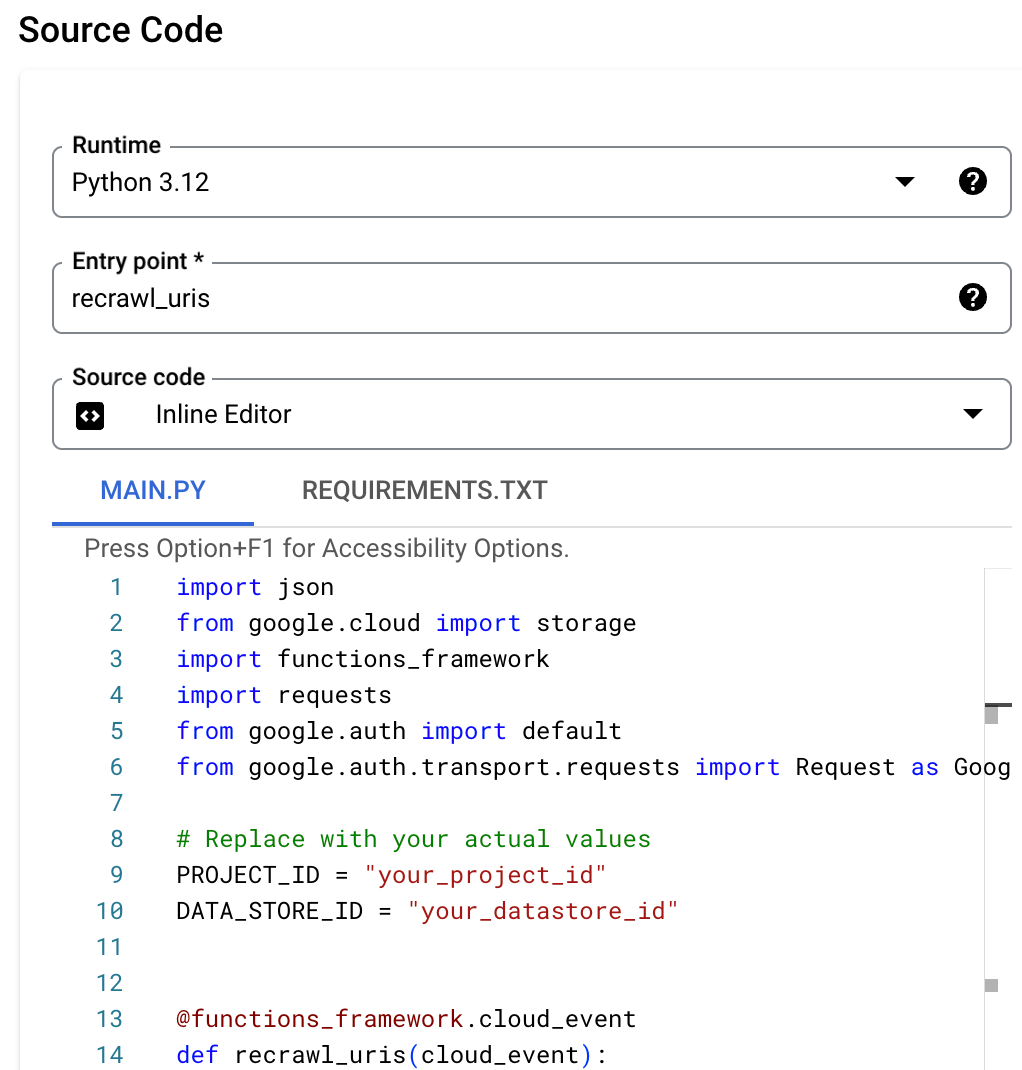


In [ ]:
import json
from google.cloud import storage
import functions_framework
import requests
from google.auth import default
from google.auth.transport.requests import Request as GoogleAuthRequest

# Replace with your actual values
PROJECT_ID = "your_project_id"
DATA_STORE_ID = "your_datastore_id"

@functions_framework.cloud_event
def recrawl_uris(cloud_event):
    """
    Cloud Function triggered by Cloud Storage events (file creation).

    Args:
        cloud_event (functions_framework.cloud_event.CloudEvent): The CloudEvent that triggered this function.
    """

    data = cloud_event.data
    bucket_name = data['bucket']
    file_name = data['name']
    print(f"File {file_name} created in bucket {bucket_name}.")

    # Process only for finalizd objects. An object is in finalized state if it is written to the bucket or an existing object is overwritten

    if file_name.endswith('.json') and cloud_event['type'] == "google.cloud.storage.object.v1.finalized":
        try:
            # Read the URIs from the JSON file
            uris = read_uris_from_gcs(bucket_name, file_name)

            if not uris:
                print("No URIs found in the JSON file.")
                return

            print("URIs to recrawl:", uris)

            # Recrawl the URIs using the Discovery Engine API
            recrawl_uris_with_api(uris)

        except Exception as e:
            print(f"Error processing file: {e}")


def read_uris_from_gcs(bucket_name, file_name):
    """
    Reads the URIs from a JSON file in a GCS bucket.

    Args:
        bucket_name (str): Name of the GCS bucket.
        file_name (str): Name of the JSON file.

    Returns:
        list: List of URIs, or None if an error occurs.
    """

    storage_client = storage.Client()
    bucket = storage_client.bucket(bucket_name)
    blob = bucket.blob(file_name)

    try:
        file_content = blob.download_as_text()
        data = json.loads(file_content)
        return data.get("uris", [])
    except Exception as e:
        print(f"Error reading URIs from {bucket_name}/{file_name}: {e}")
        return None


def recrawl_uris_with_api(uris):
    """
    Recrawls the specified URIs using the Discovery Engine API.

    Args:
        uris (list): List of URIs to recrawl.
    """

    # fetch bearer token to make REST API call
    creds, _ = default()
    auth_req = GoogleAuthRequest()
    creds.refresh(auth_req)
    access_token = creds.token

    # recrawl API endpoint to be invoked
    url = f"https://discoveryengine.googleapis.com/v1alpha/projects/{PROJECT_ID}/locations/global/collections/default_collection/dataStores/{DATA_STORE_ID}/siteSearchEngine:recrawlUris"

    headers = {
        "Authorization": f"Bearer {access_token}",
        "Content-Type": "application/json",
        "X-Goog-User-Project": PROJECT_ID,
    }
    data = {"uris": uris}

    for attempt in range(3):  # Retry up to 3 times
        try:
            response = requests.post(url, headers=headers, json=data, timeout=10)  # Added timeout
            response.raise_for_status()  # Raise an exception for bad status codes
            print(f"Recrawl request successful. Response: {response.json()}")
            return
        except requests.exceptions.RequestException as e:
            print(f"Error during recrawl request (attempt {attempt + 1}): {e}")
            if attempt < 2 and isinstance(e, (requests.exceptions.ConnectionError, requests.exceptions.Timeout)): #retry only for connection and timeout errors
                print("Retrying in 5 seconds...")
                time.sleep(5)

    print("Failed to recrawl URIs after multiple attempts.")

# Include dependencies to run the function

Finally we need to add the dependencies in the `requirements.txt` file to run the function above.

You can copy the requirements from the following code block.

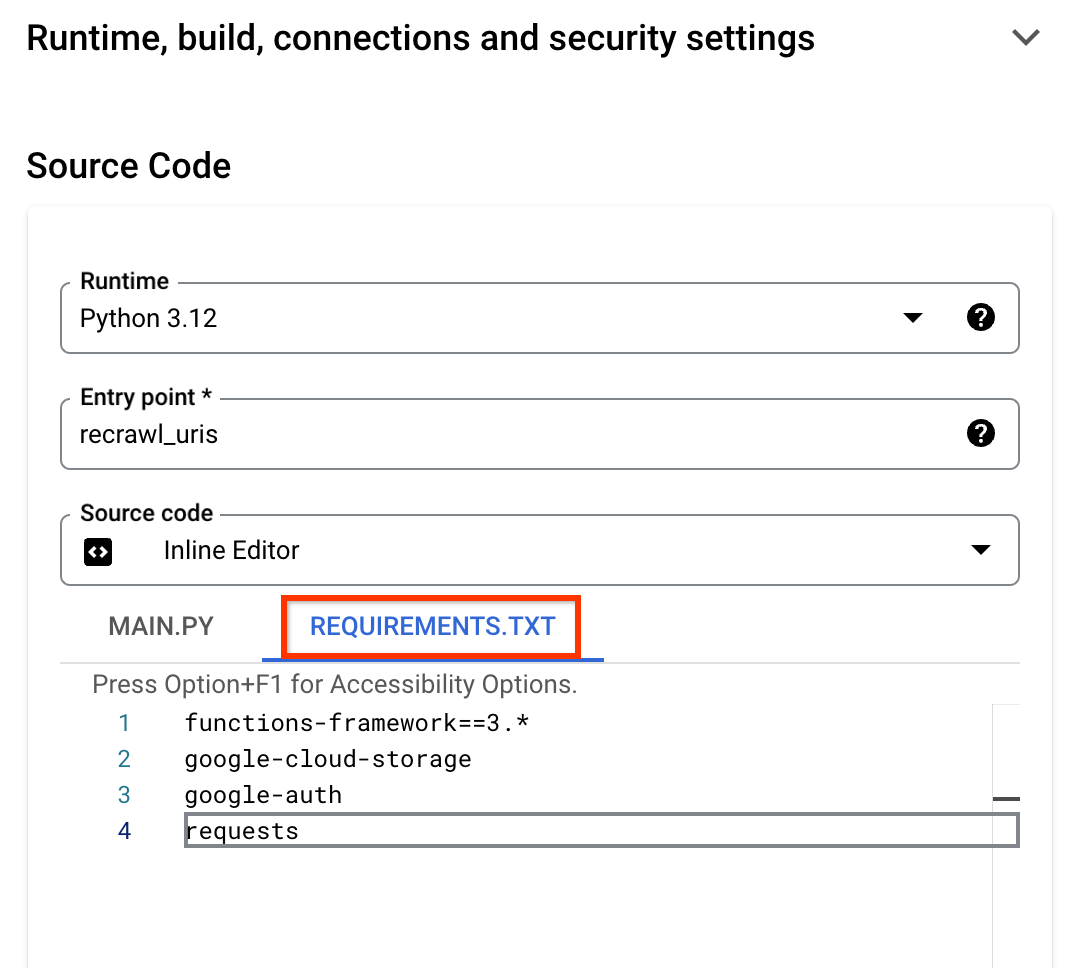


In [ ]:
functions-framework==3.*
google-cloud-storage
google-auth
requests

# Deploy the function

Once the source and requirements are added the function can be deployed with a single click.

You need to ensure that the service account used by your Cloud Function has the necessary permissions:
* Storage Object Viewer on your trigger bucket to read the files.
* Discovery Engine Admin to interact with the Discovery Engine API.
* Cloud Scheduler Invoker to recrawl uris
* Cloud Functions Invoker to invoke the cloud function
* Service Account User to make secure requests
* Logs Writer to post logs to GCP

You will typically get notified to provide necessary permissions as you try to deploy the function.

Once the function is deployed, you can find it (called `recrawl_function` in this example) in the `Cloud Run Functions` section of the cloud console. You will have the ability to edit the function, adjust the trigger, and read logs among other things.

# Test the function

Finally, you can test the function you just deployed by adding a new JSON file to your target bucket. Once the file is uploaded to the bucket, you can check the status of the function in the logs.

An acceptable JSON file to be used with the source file provided in this example needs to follow the following format:



In [ ]:
{
  "uris": [
    "https://example.com/page-1",
    "https://example.com/page-2",
    "https://example.com/page-3"
  ]
}